# Titanic survival classification problem
- Download titanic dataset.
- Train a 2-layer NN with 5 neurons per layer (input/output apart) for 20 epochs and 64 batch size.
- Save the model.

## DL model

In [1]:
import mlflow
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn.model_selection as ms

from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score,recall_score, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [2]:
# data load
dataset = sns.load_dataset("titanic")
dataframe, test_dataframe = ms.train_test_split(dataset, train_size=0.7, random_state=1)
dataframe.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [3]:
dataframe = dataframe.astype({"deck": str})
test_dataframe = test_dataframe.astype({"deck": str})

In [4]:
# data processing
for i in dataframe.index:
    if dataframe['deck'][i] == 'nan':
        dataframe.loc[i,'deck'] = 'Z'

for i in test_dataframe.index:
    if test_dataframe['deck'][i] == 'nan':
        test_dataframe.loc[i,'deck'] = 'Z'

train_median = dataframe['age'].median()
for i in dataframe.index:
    if dataframe['age'][i] != dataframe['age'][i]:
        dataframe.loc[i,'age'] = train_median

train_median = test_dataframe['age'].median()
for i in test_dataframe.index:
    if test_dataframe['age'][i] != test_dataframe['age'][i]:
        test_dataframe.loc[i,'age'] = train_median

X = dataframe[['sex', 'pclass', 'age', 'deck']]
y = dataframe[['alive']]
X_ts = test_dataframe[['sex', 'pclass', 'age', 'deck']]
y_ts = test_dataframe[['alive']]
X_ts.head(10)

,sex,pclass,age,deck
862,female,1,48.0,D
223,male,3,28.0,Z
84,female,2,17.0,Z
680,female,3,28.0,Z
535,female,2,7.0,Z
623,male,3,21.0,Z
148,male,2,36.5,F
3,female,1,35.0,C
34,male,1,28.0,Z
241,female,3,28.0,Z


In [5]:
# normalization
normalization = [X.loc[:, 'age'].mean(), X.loc[:, 'age'].std()]
print("Age normalization --> " + str(normalization))

X.loc[:, 'age'] = (X.loc[:, 'age'] - normalization[0]) / normalization[1]
X_ts.loc[:, 'age'] = (X_ts.loc[:, 'age'] - normalization[0]) / normalization[1]

X_dum = pd.get_dummies(X)
X_ts_dum = pd.get_dummies(X_ts)

Age normalization --> [29.81099518459069, 13.283963797935623]


/home/roldanx/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [6]:
# dummification
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y.values.ravel())
y = integer_encoded.reshape(len(integer_encoded), 1)
integer_encoded_ts = label_encoder.fit_transform(y_ts.values.ravel())
y_ts = integer_encoded_ts.reshape(len(integer_encoded_ts), 1)

In [7]:
opt = Adam(learning_rate=0.01)

# model definition
input = Input(len(X_dum.columns))
layer_1 = Dense(5, activation='relu')(input)
layer_2 = Dense(5, activation='relu')(layer_1)
output = Dense(1, activation='sigmoid')(layer_2)

model = Model(input, output)
model.compile(loss='binary_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 65        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist=model.fit(X_dum, 
               y,
               batch_size=64,
               epochs=5,
               validation_split=0.1,
               shuffle=True)

Epoch 1/5
9/9 [==============================] - 2s 49ms/step - loss: 0.6226 - accuracy: 0.6500 - val_loss: 0.5287 - val_accuracy: 0.7302
Epoch 2/5
9/9 [==============================] - 0s 9ms/step - loss: 0.5722 - accuracy: 0.7000 - val_loss: 0.4675 - val_accuracy: 0.7619
Epoch 3/5
9/9 [==============================] - 0s 15ms/step - loss: 0.5201 - accuracy: 0.7607 - val_loss: 0.4453 - val_accuracy: 0.8571
Epoch 4/5
9/9 [==============================] - 0s 17ms/step - loss: 0.4832 - accuracy: 0.8179 - val_loss: 0.4221 - val_accuracy: 0.8254
Epoch 5/5
9/9 [==============================] - 0s 11ms/step - loss: 0.4574 - accuracy: 0.8357 - val_loss: 0.4582 - val_accuracy: 0.7143


In [9]:
# model.save("titanic_DeepLearn_model")

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
probabilities = model.predict(X_ts_dum)
fpr, tpr, _ = roc_curve(y_ts, probabilities)
auc = auc(fpr, tpr)
print("Max ROC:")
print(auc)

Max ROC:
0.8025291275930662


In [12]:
# register the classifier
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:8000/'
mlflow.set_experiment('NeuralNetwork')

with mlflow.start_run(run_name='forest_gump'):
    mlflow.log_metric("auc", auc)
    mlflow.keras.log_model(keras_model=model, artifact_path='', registered_model_name='neural_network')

INFO:tensorflow:Assets written to: /tmp/tmprhlrrv0l/model/data/model/assets


Successfully registered model 'neural_network'.
2022/02/14 19:29:58 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: neural_network, version 1
Created version '1' of model 'neural_network'.


In [13]:
predictions = np.where(probabilities > .5, 1, 0)
cm = confusion_matrix(y_true=y_ts, y_pred=predictions)

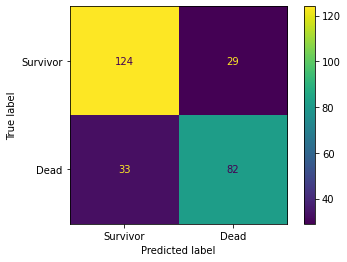

In [14]:
labels = ['Survivor', 'Dead']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

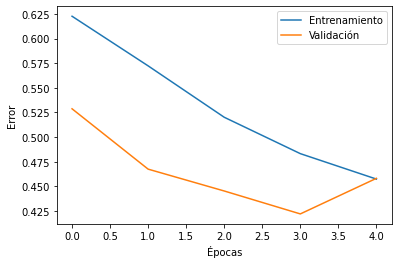

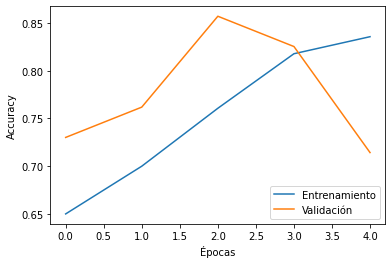

In [15]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right')

plot_curves(hist.history)

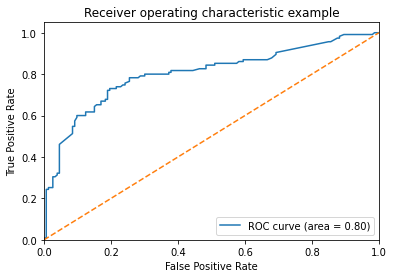

In [16]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()